<h2><a href="https://leetcode.com/problems/nearest-exit-from-entrance-in-maze">1926. Nearest Exit from Entrance in Maze</a></h2><h3>Medium</h3><hr><p>You are given an <code>m x n</code> matrix <code>maze</code> (<strong>0-indexed</strong>) with empty cells (represented as <code>&#39;.&#39;</code>) and walls (represented as <code>&#39;+&#39;</code>). You are also given the <code>entrance</code> of the maze, where <code>entrance = [entrance<sub>row</sub>, entrance<sub>col</sub>]</code> denotes the row and column of the cell you are initially standing at.</p>

<p>In one step, you can move one cell <strong>up</strong>, <strong>down</strong>, <strong>left</strong>, or <strong>right</strong>. You cannot step into a cell with a wall, and you cannot step outside the maze. Your goal is to find the <strong>nearest exit</strong> from the <code>entrance</code>. An <strong>exit</strong> is defined as an <strong>empty cell</strong> that is at the <strong>border</strong> of the <code>maze</code>. The <code>entrance</code> <strong>does not count</strong> as an exit.</p>

<p>Return <em>the <strong>number of steps</strong> in the shortest path from the </em><code>entrance</code><em> to the nearest exit, or </em><code>-1</code><em> if no such path exists</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/06/04/nearest1-grid.jpg" style="width: 333px; height: 253px;" />
<pre>
<strong>Input:</strong> maze = [[&quot;+&quot;,&quot;+&quot;,&quot;.&quot;,&quot;+&quot;],[&quot;.&quot;,&quot;.&quot;,&quot;.&quot;,&quot;+&quot;],[&quot;+&quot;,&quot;+&quot;,&quot;+&quot;,&quot;.&quot;]], entrance = [1,2]
<strong>Output:</strong> 1
<strong>Explanation:</strong> There are 3 exits in this maze at [1,0], [0,2], and [2,3].
Initially, you are at the entrance cell [1,2].
- You can reach [1,0] by moving 2 steps left.
- You can reach [0,2] by moving 1 step up.
It is impossible to reach [2,3] from the entrance.
Thus, the nearest exit is [0,2], which is 1 step away.
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/06/04/nearesr2-grid.jpg" style="width: 253px; height: 253px;" />
<pre>
<strong>Input:</strong> maze = [[&quot;+&quot;,&quot;+&quot;,&quot;+&quot;],[&quot;.&quot;,&quot;.&quot;,&quot;.&quot;],[&quot;+&quot;,&quot;+&quot;,&quot;+&quot;]], entrance = [1,0]
<strong>Output:</strong> 2
<strong>Explanation:</strong> There is 1 exit in this maze at [1,2].
[1,0] does not count as an exit since it is the entrance cell.
Initially, you are at the entrance cell [1,0].
- You can reach [1,2] by moving 2 steps right.
Thus, the nearest exit is [1,2], which is 2 steps away.
</pre>

<p><strong class="example">Example 3:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/06/04/nearest3-grid.jpg" style="width: 173px; height: 93px;" />
<pre>
<strong>Input:</strong> maze = [[&quot;.&quot;,&quot;+&quot;]], entrance = [0,0]
<strong>Output:</strong> -1
<strong>Explanation:</strong> There are no exits in this maze.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>maze.length == m</code></li>
	<li><code>maze[i].length == n</code></li>
	<li><code>1 &lt;= m, n &lt;= 100</code></li>
	<li><code>maze[i][j]</code> is either <code>&#39;.&#39;</code> or <code>&#39;+&#39;</code>.</li>
	<li><code>entrance.length == 2</code></li>
	<li><code>0 &lt;= entrance<sub>row</sub> &lt; m</code></li>
	<li><code>0 &lt;= entrance<sub>col</sub> &lt; n</code></li>
	<li><code>entrance</code> will always be an empty cell.</li>
</ul>


## Time Limit Excceeded


In [1]:
from collections import deque
from typing import List
class Solution:
    def nearestExit(self, maze: List[List[str]], entrance: List[int]) -> int:
        vis = [[False for _ in range(len(maze[0]))] for _ in range(len(maze))]
        count = 0
        directions = [(1,0), (-1, 0), (0, 1), (0, -1)]
        queue = deque([((entrance) , 0)])
        rows = len(maze)
        cols = len(maze[0])

        # find exits
        # Horizontal
        exits = set()
        for i in range(len(maze[0])):
            if [0,i] != entrance and maze[0][i] != '+':
                exits.add((0,i))

            if [rows-1,i] != entrance and maze[rows -1][i] != '+':
                exits.add((rows -1,i))

        for i in range(len(maze)):
            if [i,0] != entrance and maze[i][0] != '+':
                exits.add((i, 0))

            if [i, cols -1] != entrance and maze[i][cols -1] != '+':
                exits.add((i,cols -1))

        # print(exits)
        if len(exits) == 0:
            return -1

        while queue:
            (x, y), d = queue.popleft()
            vis[x][y] = True
            if (x,y) in exits:
                return d

            for dx, dy in directions:
                if 0 <= x + dx <len(maze) and 0 <= y + dy <len(maze[0]) and maze[x+dx][y+dy] != '+' and vis[x+dx][y+dy] == False:
                    queue.append(((x +dx, y + dy), d + 1))
        return -1

## Passed after changing just one condition of visit
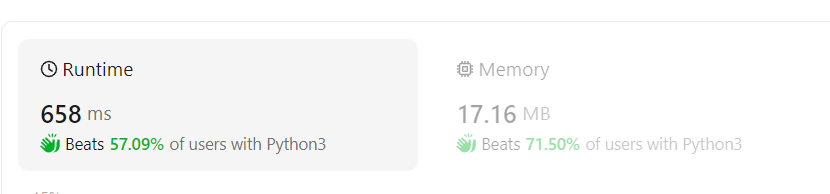

In [3]:
from collections import deque
class Solution:
    def nearestExit(self, maze: List[List[str]], entrance: List[int]) -> int:
        vis = [[False for _ in range(len(maze[0]))] for _ in range(len(maze))]

        directions = [(1,0), (-1, 0), (0, 1), (0, -1)]
        queue = deque([((entrance) , 0)])
        rows, cols = len(maze), len(maze[0])


        while queue:
            (x, y), d = queue.popleft()
            # vis[x][y] = True

            if ((x  == 0) or (x == rows -1) or (y == 0) or (y== cols -1)) and [x,y] != entrance:
                        return d 

            for dx, dy in directions:
                if 0 <= x + dx <len(maze) and 0 <= y + dy <len(maze[0]) and maze[x+dx][y+dy] != '+' and vis[x+dx][y+dy] == False:
                    queue.append(((x + dx, y + dy), d + 1))
                    vis[x+dx][y+dy] = True           # added visit here 


        return -1